<img src="./Images/header1.png" align="left" style="width: 600px; height: 170px"/>

## Exercise 05

# Neural networks

## 4.1 Little Red Riding Hood Network

Train a neural network to solve the  Little Red Riding Hood problem in sklern and Keras. Try the neural networ with different inputs and report the results.


### Usando Scikit Learn

In [1]:
import pandas as pd
import numpy as np
from sklearn.neural_network import MLPClassifier

Creación de matrices X,Y

In [2]:
X = np.array ([[1,1,0,0], [0,1,1,0], [0,0,0,1]])

In [3]:
y = np.array ([[1,0,0,0], [0,0,1,1], [0,1,1,0]])

Definición del modelo

In [4]:
nn1 = MLPClassifier(solver='adam', alpha=1e-5, hidden_layer_sizes=(3), random_state=31415, max_iter=2500)

In [5]:
nn1.fit(X, y)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=3, learning_rate='constant',
       learning_rate_init=0.001, max_iter=2500, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [6]:
nn1.predict(X)

array([[1, 0, 0, 0],
       [0, 0, 1, 1],
       [0, 1, 1, 0]])

Gráfica de costo por iteración

In [7]:
import matplotlib.pyplot as plt

plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(nn1.loss_curve_)
plt.show()

#### Prueba de la red en diferentes escenarios

Teniendo en cuenta que solo existen 2 opciones por cada variable, se evaluarán las 16 posibles alternativas:

In [8]:
X_test=np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0],
                 [0,1,1,1],[0,1,1,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0],])
y_pred=nn1.predict(X_test)

In [9]:
Try_nn1=pd.DataFrame(np.concatenate((X_test,y_pred),axis=1),
             columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled', 'Scream', 'Hug','Food','Kiss'])
Try_nn1

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1,1,1,1,0,0,1,0
1,1,1,1,0,1,0,0,1
2,1,1,0,1,1,0,0,0
3,1,1,0,0,1,0,0,0
4,1,0,1,1,0,1,1,0
5,1,0,1,0,0,0,1,1
6,1,0,0,1,0,1,1,0
7,1,0,0,0,1,0,0,0
8,0,1,1,1,0,0,1,1
9,0,1,1,0,0,0,1,1


A partir de todas las posibles opciones se opuede notar que la respuesta más frecuente será ofrecer comida (75% de las veces), seguidas por besar y abrazar (30% de las veces) mientars que gritar es el resultdo menos frecuento con solo el 25% de las veces.

### Usando Keras

In [10]:
import pandas as pd
import numpy as np
X = np.array ([[1,1,0,0], [0,1,1,0], [0,0,0,1]])
y = np.array ([[1,0,0,0], [0,0,1,1], [0,1,1,0]])

In [11]:
from keras.models import Sequential
from keras.layers.core import Dense

C:\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


#### Variación del número de neuronas 

Calibramos el modelo de acuerdo al número de neuronas

In [12]:
res=[]
n_neu=[]
for i in range(1,101):
    n_neu.append(i)
    nn2 = Sequential()
    nn2.add(Dense(i, input_dim=4, activation='relu'))
    nn2.add(Dense(4, activation='sigmoid'))
    
    nn2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])
    
    nn2.fit(X, y, epochs=100, verbose=0)
    
    scores = nn2.evaluate(X, y)
    
    res.append(scores[1])

3/3 [==============================] - 4s 1s/step


#### Gráfico de Cambio en Accuracy según el aumento en las neuronas.

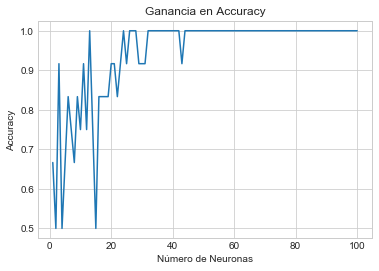

In [13]:
import matplotlib.pyplot as pltdata:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAXsAAAEPCAYAAACjjWTcAAAABHNCSVQICAgIfAhkiAAAAAlwSFlzAAALEgAACxIB0t1+/AAAADl0RVh0U29mdHdhcmUAbWF0cGxvdGxpYiB2ZXJzaW9uIDIuMS4yLCBodHRwOi8vbWF0cGxvdGxpYi5vcmcvNQv5yAAAIABJREFUeJztnXlgFFW2xr+q3rJ02AOyCEIwEGQQEREEZBMFhFFAJIK4PBd0cBwR0YDjhhFBfS6DI+AyICiCIrgwM28wuCAoqGEZlggDhjDsSQgk3Z10dVXd90d3VW/V6YZ0dTfd5/cP6apK1b0Bvjr57rnncIwxBoIgCCKp4eM9AIIgCEJ/SOwJgiBSABJ7giCIFIDEniAIIgUgsScIgkgBSOwJgiBSABJ7ImqsXr0aEyZMwKhRo3Ddddfh7rvvxs6dO+M9LJUNGzagsLAwbs//4x//iKuvvhq1tbVxGwORunCUZ09Eg1dffRU///wzXnnlFbRt2xYA8OOPP2L69OlYs2YN2rRpE+cRxpeTJ0/ipptuwuWXX47Bgwfjtttui/eQiBSDInuiwVRUVOD999/HG2+8oQo9APTr1w8FBQVqJPvNN98gPz8f48aNw+DBg/H6668DALZu3Yr8/HzMnDkTN998M0aPHo3i4mIAQGlpKe6++27ceuutGDJkCB588EE4nU4AwO9+9zssWLAA+fn5GDp0KFasWKE+e/HixRgxYgRGjx6NadOmoaamBmvWrMHUqVMBADt27MDkyZMxYcIEDB48GLNnz9acW01NDQoKCjBu3DiMGTMGc+fOhSiKYZ8fyMcff4x+/fph7NixWLZsGXxjrJ07d2LChAkYPXo0xo4dix9//LHe4126dMHp06fV71c+b926Fb///e+Rn5+PMWPGQBAEFBYWqr9tjRw5Uv252u12zJo1CzfccANGjRqFV199FQ6HA1dddRVKS0vVe991110oKioK/ZdPXDgwgmggX331FRs7dmy918iyzG6//XZWWlrKGGPsxIkTLC8vj1VWVrItW7awvLw8tnfvXsYYY++99x6bPHkyY4yxefPmsc8++4wxxpggCGz06NHs//7v/xhjjOXm5rLly5czxhjbtWsX6969O6urq2NFRUXs+uuvZ2fOnGGMMTZ37lz21ltvsU8//ZTdf//9jDHGpk+fzrZs2cIYY8xms7Grr76a7dq1K2jcBQUFbNmyZYwxxkRRZI899hh7++23631+IC6Xiw0YMIB9/fXXzOl0squuuop9++236pz69+/PvvnmG/U+o0ePZk6nU/O4JEksNzeXVVZWqvdXPm/ZsoV17dqVHTlyhDHG2LZt29gf//hHJkkSY4yxxYsXs6lTp6o/k+nTpzNRFJnT6WSTJ09mW7ZsYYWFhWz+/PmMMcbKysrYoEGDmCiK9f7dEhcGxni/bIgLHxbgBNpsNkyePBkA4HA4MHLkSDz66KNYtGgRvv32W6xbtw4HDx4EY0yN+tu0aYO8vDwAQLdu3bB27VoAwMyZM7F582a88847OHToEE6dOgWHw6E+a9iwYQCAyy67DIIgwOFw4Mcff8SIESPQuHFjAMCsWbMAAGvWrFG/b968edi4cSMWLVqE3377DU6n0+++Ct9++y127dqF1atXAwDq6ur8zms932Kx+F2zYcMGyLKMgQMHwmg0YtSoUVi2bBkGDRqE/fv3g+d5DB48GADQvXt3fPnll9izZ4/m8XC0bt1a/e3qiiuuQOPGjbFy5Ur897//xdatW5GZmQkA+OGHHzBr1iwYDAYYDAZ88MEHAICWLVvi9ttvx/Tp07Fq1SrccsstMBgMYZ9LJD4k9kSD6dGjB0pLS1FVVYWmTZvCarXi888/BwAsWLAAVVVVcDgcGDt2LK677jr07t0b48ePR1FRkfqiSEtLU+/HcZx6/NFHH4UkSRg5ciQGDx6M48eP+71cFGHlOA6A+8VjMBjUzwBQXV2N6upqvzHffvvt6NKlCwYOHIiRI0di586dQS8tAJBlGW+88QZycnLUe/neW+v5gaxYsQJ1dXW4/vrrAQCCIKC8vBz/+c9/gsYKAPv37w95vFOnTn7HBEHw+5yRkaF+/e233+KFF17A3XffjWHDhqFTp0744osvAABGo9Hv/sePH0daWho6duyILl26YMOGDVi3bh0+/vjjoPkQFybk2RMNplWrVrjjjjvwpz/9CceOHVOPHz16FNu2bQPP8ygrK4PNZsMjjzyCoUOHYuvWrRAEAbIs13vvTZs2Ydq0aRg1ahQAt48tSVK933PNNdfgq6++gs1mA+B+4SxdulQ9X11djV27duGxxx7D9ddfjxMnTuDw4cOaYxkwYACWLl0KxhgEQcCDDz6oRsGRUFpaip9//hlr1qzB119/ja+//hqbNm3CVVddhWXLlqFTp07gOA6bN28GAOzZswd33nlnyOOyLKNZs2bYtWsXAGDdunUhn71582YMGTIEkyZNQvfu3VFUVKT+7Pr164e1a9dClmUIgoCHH34YP//8MwBg0qRJeOmll9CjRw+0atUq4rkSiQ1F9kRUmD59Or744gvMmDEDtbW1qKmpQePGjTFq1ChMnjwZFosFgwcPxsiRI2E2m5Gbm4vOnTujrKwMZrO53vtOmzYNGRkZsFqtuOqqq3D48OF6xzJo0CAcOHBAzXjp3Lkznn/+eaxfvx4A0KhRI9x///0YO3YsMjIy0KpVK/Tq1QtlZWXo16+f372efPJJvPDCCxgzZgxcLheuueYa3HvvvRH/XD766CNcd9116NChg9/xadOmYerUqZg+fToWLFiAuXPn4qWXXoLJZMKCBQtgNptDHv/zn/+MOXPmoFGjRrjmmmuQnZ2t+ez8/HzMmDEDY8aMgSiK6N+/P9avXw9ZlvHQQw/hhRdewE033QRJkjBq1Cj1N48hQ4bgz3/+M/Lz8yOeJ5H4UOolQRB+bN++HX/+85+xbt26ICuJuHChyJ4gCJUnnngCP/30E1577TUS+iSDInuCIIgUgBZoCYIgUgASe4IgiBSAxJ4gCCIFSNgFWqWGB0EQBBE5V155pebxhBV7IPSgtSgpKVG326cKqThnIDXnnYpzBlJz3g2Zc31BMtk4BEEQKQCJPUEQRApAYk8QBJECkNgTBEGkACT2BEEQKYBuYr9z505MmTIl6PjXX3+N8ePHY+LEiVQrmyAIIkboknr5zjvv4IsvvkB6errfcZfLhRdffBGrV69Geno6brvtNgwZMiRkiVYiNjDGEKpCEs+fWzEsWda/1JLMmOZztMZa39wuJELNOdlJxXnrVa5MF7Fv3749FixYgMcff9zv+MGDB9G+fXu1XdyVV16JX375BSNHjtRjGAmBIMoYveB7PHljNwzKjd9L7b+nHbh18Y9YeX9fdGieqR63O0UMevlbVNicmt/3/M3dMaVvB81zgby6fh/+8vWBqIw3PKVBR54clYf7rvXv5PTEp//Gx78cidGY9CZ4zqlBas2778UZWNmtW9Tvq4vY33DDDThyJPg/mM1mQ1ZWlvo5MzNT7SakRUlJScTPrKurO6frY0VVrYj9J23YuPMAWkoVUb33ucx5c5kdx8/WYf3PezGgg1U9fqhKQIXNiUGXZOLiJv5NRD7bexYbdx1C78bBvVm1+L7kOFpmGnH9pVnhL24AoijCaPT/p7vu12ps3HMYA7L9X1pb/nMSlzQxYcAlVlzIaM05FUjFeXdqxOmiZTH9KVqtVtjtdvWz3W73E/9AzmUXWaLutDtS5QBwGI2btUBe3qVRvfe5zPmXM4cAnISlcTby8i5Rj1f+pwLAEUy7oQf6dGzm9z273twEwWCO+Bm1/ypHzw6NUJjfO7IJnCda8z7w9o9wysH/Zqo/+S9+f3kbzLmpu65j0ptE/fetN6k476TYQZuTk4OysjKcOXMGgiDgl19+wRVXXBHLIcQcpyh7/qy/b6relNc4/f5Uj9vqAAAtrMGtAVtYLUHXh3tGiyxLA0Z5/rSwWlAeYEU5RQlnHC60sMZnTASRSMQksv/yyy/hcDgwceJEFBQU4J577gFjDOPHj0/6hsZOl+z3Z7xQhDBI7D2fszVEOjvLgn8fPRvR/V2SjNMOAdlxEtbsrOAXU6VNUM8RRKqjm9i3a9dOTa0cM2aMenzo0KEYOnSoXo9NOJSIXonw40XIyL7GiTQTD6sl+J9CdpYFlTYnJJnBECYr57RdAGPxE9bsLAtsThEOQUSG2T0X9UVGkT1B0KYqvUk4G8cWLPbZWRbNfqPZWRbIzC3kkd4/bmLvEfSKGu9Y4z0mgkgkSOx1xiv2CRrZ25whI1/leCS+fbyFVXmusgbh/prEniAUSOx1xulyR/RCHMWeMYYKj39dYXP6bdpQInstvAJ6DmIfR8/edxy+XzfXWHwmiFSDxF5nBCn+kX11rQhBktGuaTpcEsPZWpd6rsImhBX7ikgi+zhH0d4Xk9fGqbA50STDBIvREJcxEUQiQWKvM2o2Thw9e8Xa6Na6kfuzR7xdkozTdgHZ1jTN71NSFiON7LPSjEgzxUdYm2dawHPBkT0tzhKEGxJ7nVE9+zimXp7yCGC3Nv5iHy41MdNiRKbZEJlnbwttB8UCA8+hWaYlWOzJrycIACT2upMIqZeKAOYpkX1Azr3WhiqFFhr566GeEe/NSy2sZn+xt8V/TASRKJDY60wipF4qAhho4yj2Tn3Rb3aEu2grEiCKzs7y30VLkT1BeCGx1xmvZx/HyN7mhNnAo13TdJiNfFAaZr1inxVchkDzGQngj2dnWdTFZLtThEOQSOwJwgOJvc6oNk4cPXvfjVO+kbrXxgkj9mEi+1pBQo1TjLuwKmNljMU9FZQgEg0Se51JFBtHKVDmG6mX1zjRKEwGTbbVgrO1rnrHX5Egm5eyrRYIkozqWjHuqaAEkWiQ2OtMIizQVti8Bcp8I/VIMmjUXHtb6JIJpyKwg2KB7y7aeO/oJYhEg8ReZxLCs/dZqMzOsqiReEVN6A1VClo7U7XuD8TfMvGOVUiY3zYIIlEgsdcZReQlmUGUYi/4ksxw2u4j9lYLKu0CREn2RPbaG6oUItlFqwhryzgLa0s1sneivMYJA8+haQaVSiAIgMRed3y97nhE95V2J2Sf0sPZWRYwTyXLSDJoIqmPU17jBMcBzTLjK6zKTuDyGrfYN880hy3NTBCpAom9zvgKfDzEPtBiUcS77LQDtggyaJpnRmDj2NzCajTE959To3QjzAZeFXuycAjCC4m9zvimXMYjI8e7UOmOupU0y5Lj1Z7P9UfjZiOPJhmmsJ59IuxU5ThO3UVLu2cJwh8Se53xs3HikGvvjezdFofia+895hb7SKLfcLtoEymKVlJLE2lMBJEIkNjrTNxtHI/X3iIgst97/BzEPswu2kTYPauQnWXBqeo6VMS5MBtBJBok9jrjFGWkezYtxcvGsVqMal/WdLMBWRYjfj1RA+AcxD5EZM8Yi3vFS1+ysyz4rcIOl8QS5gVEEIkAib3OOEUJWWlGz9exj+y1mpNkZ1kgiDJ4zrsAWx+KjePb4Uqhuk6EIMqJI/ZWi9oVLFHGRBCJAIm9zjhdslfs4+LZ1wVFuErphGaZlohSE7OzLKh1SbALwb+ZJNpOVd9xJMqYCCIRILHXGacoo1G6yfN1fGwcrcje989w1LeLNlF2zyqQ2BOENiT2OuMUJTRKU8Q+Ptk4QWJvPT+xr9BYpE20sgQk9gShDYm9jjDG4hrZ17kkVNcFb5zyLZ0QCRFF9gkirEqKqcXII8tijPNoCCJxILHXEZfEwBjQKE6evRJ1B26cUkReSccMh9p4XEvsbU6YDBwae15o8cY3xZTjqFQCQShQ6KMjSiTvjeyjK/Z2QcbZWhcAIN1kgNno/+4OFXWfa2TfNMNdY+ZIlUN9nsKxM7UJJawZZneT9ET5TYMgEoWUEftpK7ahTeM0PHljN13uf+xMLW54fSM+ffAa5LbKAuAVd69nHz0b52+bSjFn3SEAhwC4I9kfZw2Fyac+TahOVBc1dlsdrRunR/QsA8+hZZYF73xfine+Lw06f/nFTc59AjpyUeM0tG5cfzVPgkg1Ukbs/3OyBg6nqNv9D1XaUVMn4uApW7DYp7t/zEIUI/s9x6qRZeHxyPCu2PHfM/hy5zFU2Jx+Al6ulh72F76uF2Vh8ZQrMaRLy4if9/rEntjtKbEQSJ9Lmp3HDPTjjfwr1HRXgiDcpMz/CFFiEOXgTUHRwuF0R+2+uehOl/vrTLMRBp6Lqo1TYXOitdWEewZ0xFd7T7rFvkbwE/uKGnd3qeYBnj3HcbjhsovO6XlXd2qOqzs1b/jAY0D3to3jPQSCSDhSZoFWlBlEST+xtwvu3xocgve3B0XcLUYeFiMfVbEvr3Giabq7DINvOz6/a2x1aJZp9rN2CIJITXRRAVmW8fTTT2PixImYMmUKysrK/M6//fbbuOmmmzB58mR88803egwhCFGSIcr6ZcPUeiJ6hxDcrMRi8oi9K3qefblNQ+wDsmUSqUAZQRDxRRcbp6ioCIIgYNWqVdixYwfmzZuHhQsXAgD27duHdevW4ZNPPgEA5Ofno2/fvkhPj2yx8HxxyQwuXSN7j9j7rAso4m4xGmAxGqIW2UsyQ6XNiaaen5mSWqkp9pSVQhAEdIrsi4uLMXDgQABAz549sXv3bvXcwYMH0adPH1gsFlgsFnTo0AH79u3TYxh+6B3ZKyJv14rsjTwspujZOKftAmQGNbK3GA1olGYMFvsEqkZJEER80SWyt9lssFqt6meDwQBRFGE0GtGlSxe8/fbbsNlscLlc2L59OyZOnKh5n5KSkoifWVdXV+/1gkuC3VH/NQ3h8PFKAMDRkxXqMw4etgMAjh05DEgulJ8+E5Xn/3baLepWg6zer7GFw8Fj3mczxnDqbB14wabbnONFuL/rZCQV5wyk5rz1mrMuYm+1WmG329XPsizDaHQ/KicnB5MnT8Z9992HDh064PLLL0fTpk0175OXlxfxM0tKSuq9XkYZDCbzOd3zXEjfvxvAWZgzstRnHHQdA3ASXS/NQaPtNljSLVF5/qn95QCOomXjdPV+bb8/A6fM1M81dS44pVJ06dAaeXk5DX5mIhHu7zoZScU5A6k574bMubi4OOQ5XWycXr16YePGjQCAHTt2IDc3Vz13+vRpVFVV4aOPPsKTTz6J48eP49JLL9VjGH6IsgxR0s/GsTuVBVqvZy/olI2j2DVN0wzqseysND8bJ9Fq1hAEEV90ieyHDx+OzZs3Iz8/H4wxzJ07F0uWLEH79u0xdOhQHDlyBOPHj4fJZMLjjz8Og8EQ/qYNgDH34qyeC7SKyCuiD/h69gaPZx+dbBxV7NN9xD6gT2xg71mCIFIbXcSe53nMmTPH71hOjtdKCDynN5JnM5WeC7RqNo6glY3Dw2I0oKYuOjt4y2ucyDQbkG7y/mKWnWWBXZDgEERkmI3q7lmK7AmCAFJkU5Wyc1bSdQdtPdk4ap59dF42Ws201Zrznl2zFWTjEAThQ0qJfczz7D1ibzYonn30bJxQYq/soi23OWHkOTRJkNLDBEHEl9QQe8/CrJ4LtKpn7xfZSzDyHIwGPqqbqrTy57MDas6X1zjRwmoBH0GPWYIgkp+UEHslonfpaONoZeM4XTIsnhrz0dxUpQi5L0rTDl+xJwuHIAiFlBB7KRaevUfkXRJTUy6dogyLSdnlGp3aOE5RwtlaV1DNm+aZFvCcj9jbnEEdqgiCSF1SQuxdHvtGkhkYi77gyzKDQ5DU9oOK8DtFyRvZR8nGqbC5F2ADo3YDz6FZpkXNwqHIniAIX1JC7H3r2OuxSFvridgVcVV8e6foY+MYeU+Z5YYJfn2bpbKz3Ln2ssxQYRNI7AmCUEkNsfcRWD1y7ZVa9oq4Khk5bs/ebeMo/WGFGIh9lUOAJDMqb0wQhEpKiL1vNK9HZK90qcr2tP/zRvYSLCZvZA+gwbn29Yq9Zxetd0MV7Z4lCMJNSoi978KsHou0SsMSJZJWI3tfG8ezUNtQ314R++aZ2pF9hU2gujgEQQSREmLv8rFu9Mi1dwTYOP6evTcbx32sYRk5FTYnmmaYVFvIl+wsCwRJxsFTNr/xEARBpITY+/ae1SPXXhF31bMPkY3jPtbwyD6UiCvH9x6v9vtMEASRImKvc2TvDFigVSJ7lxx9z76e7lOKjbT3eDXSTQZkmvWtJkoQxIVDaoi9TzQv6hnZe8TW7ufZe2wcU3RsHK3dswrZnl20+0/Y0CLLDI6jUgkEQbhJEbH3jez1WKB1i7tSssDhm40TRRuHMea2cUKJvad2vSDJlHZJEIQfKSH2/qmXOuTZe1IvG6WZYDHyat594KYq97Hzj+ztgoRalxTSxmmUboTZ4H4O+fUEQfiSEmLvG83rYeM4BBE85xb0TItRzbt3e/b+No7QgMg+XEolx3HqORJ7giB8SQ2x1zn10u6UkGk2guM4ZJgNsAsiGGNRt3EiyZ9voYg9tSMkCMKH1BD7GET2GRa3mGea3ZG9KDPIDME2TgOycSIRe8Wrp8ieIAhfUkPsdV6gtQvuyB4AMizuyN632bj7z4Z79uU17i5U9S2+ko1DEIQWujQcTzT8FmjrKYQmywwyYzAa6n8HuiQZJp9rHE5vZJ9hNsAhSN5m46bIyiXUuSRU2oV6n3uo0gEDz6FpRug69ST2BEFokRJi77+pKnRk/9dvDuAfu0/gn38aGPKaHw5U4J73f8GmJ4aguZJXL4jIUCJ7sxGVNodPZB+YjaMt9nf+7SdsLT0ddi5tm6TX22qwbRO3V9+6MXn2BEF4SQ2x9yuEFjqyL620Y9+JakgygyGEoJZW2lHrknCo0qGKvUOQ0DzTHW1nKpG90mzcI/JGngPPIWS3quNn69CrfRPkX9W+3rl0uSir3vM39WyLS5pnolUjEnuCILyknNjXV+LY4ZQgM+C0PXTjDyWtUlksBdw7Zi9ulgEAyLAY4RBE1ZtXPHuO4+rtVuWSZHRuacWtV118DjMLJs1kwNWdmjfoHgRBJB+psUAbYfMSZTOUr5CHvMbmvcYhSGodmkyzAXanpGbdWHyqU9bXdDxwHYAgCCKapIS6RNq8RClz4CvkIa8JiOx9Pftal6Rep0T27q/5kNk4gkhiTxCEfqSEukSaeqkUMKuoL7JXrgmM7JU8e8+fZ2vdmTVKNg7gaToeIs/eJTHNGvUEQRDRICXUJdIF2vOJ7AVRhigzv8geAE7bXQACbBxjOBuHqlQSBKEPqSH2Eds4EXj2Tv9rlO9RPXtPZF/l8ET2vjaOSdvGkWUGUWZk4xAEoRspoS6iT9Rc7wKtRqZNIIGRvVLLPsPiH9lX2RWxD7BxNCJ7ZaMXiT1BEHqREurikhnSPDtYQ0X2ksxQ6wov9r7ZOIwxtUuVUi5B+bPK4bFxTAE2joZnr4zJTGJPEIROpIS6SJJX7KUQhdBqfTY71evZe6J/QZRRXSd6I3uPjZNRn40TIhvHJSqRPXn2BEHogy5iL8synn76aUycOBFTpkxBWVmZ3/n33nsP48aNw/jx4/HVV1/pMQQ/XLKsRs2hShwrEbrJwIWN7BVRLq9xqt+XYfZWvQTcG7OACG0cz5hMlI1DEIRO6LKDtqioCIIgYNWqVdixYwfmzZuHhQsXAgCqq6uxfPlyrF+/HrW1tbj55psxfPhwPYahIkoMJgMHk4GDK0Rkr0ToFzfLwG/ldk8t+uCG3Q5BUq8pr3Gq35epevaBkb1XwM0hsnEEiTx7giD0RRd1KS4uxsCB7mJiPXv2xO7du9Vz6enpaNOmDWpra1FbWxuTptiiLMNo4GHk+ZCRvZJlc0nzTABAhU27AqXdKarXlNucajaOGtlbvJG9gef8Kmi6PXsNG4c8e4IgdCZsZO9yuWAymc7ppjabDVarVf1sMBggiiKMRvfjWrdujRtvvBGSJGHq1Kkh71NSUhLxM+vq6kJeX3WmGpJLBA+GUxWVmteVnKwFAGRx7prxP+/6FdUt/IuJSTKDU5TVa/YcOAyz0f2yOna4FM4Koxql19SJSDNyfs9y2KphdwpBzy87436xnDpxDCUl1VGZczKTivNOxTkDqTlvveYcVuzHjRuHvn37YsKECcjNzY3oplarFXa7Xf0sy7Iq9Bs3bsSpU6ewYcMGAMA999yDXr16oUePHkH3ycvLi+h5gPvFEOr69K02WGUnzgq1aNS4qeZ1J/hTAI6j16UX4/OSPbA2b4O8vFZ+11TXuQCUonvHtvjH/hrwmU3QONMMoAKXX9YVWWkmMMZg4MsgyQzpZqPfsy46uBfSIUfQ8+VjZwEcwSXtL0Ze3kVRmXMyk4rzTsU5A6k574bMubi4OOS5sL7B559/jgEDBuDNN9/ElClT8Mknn/gJuRa9evXCxo0bAQA7duzwe0k0btwYaWlpMJvNsFgsyMrKQnV15NHs+eCSZBh4DgaeC5lnX+vx3js0d1ev1MrIUTJxrGlGtLBa3J69U8nGcb/MlD60AII8/5DZOB4bhxZoCYLQi7CRPc/zuPbaawEAq1evxvLly/Hpp59i7NixmDhxoub3DB8+HJs3b0Z+fj4YY5g7dy6WLFmC9u3bY9iwYfjhhx9w6623gud59OrVC/3794/urAJQF2h5LmSeveLZt/eUKtbKyLH7+PPZWW6xb55pRpqJ96t/n2k2oqZO9MuxB9zi75JYUL18JRuHPHuCIPQirNi/9NJL2LBhA/r06YP77rsPPXr0gCzLGDduXEix53kec+bM8TuWk5Ojfv3www/j4YcfbuDQI0eUZRh5HkZD6AVaZWdskwwzmmaYNMVeiewzzUZkWy04frYOFzdLV9MtFZRce0tApK6IvyDKSDd7o35vnj2JPUEQ+hBW7C+55BKsXbsWGRkZcLncu0J5nsebb76p++CihSgzpJk4GA2cX1E0X3yjdsWiCXfNv4+ehcMpqeKuoIi/lo0DuJuO+4q9N/WSNlURBKEPYUNJxhhef/11AMDUqVPx2WefAQDatWun78iiiCgxGHkORp4LWeLY4ZTAc25Bzs6yaHv2ithbjMjOsqDS5kR1nRgc2ZtDRPZG7abjqmdPkT1BEDoRVl1WrlyJGTNmAAAWL16Mjz5IQCB3AAAf/0lEQVT6SPdBRRuX5JNnH2KB1i64RZvjONWPD7pGtXHcnr3MgCNVDlXcFZRc+2DP3hPZuwLF3r9fLUEQRLQJqy48z8NicfdjNZlMMdkEFW3c5YM9O2jriewVOyY7hI1T61PhUulRe/i0QxV3hZDZOIpnL/ln5ChibwzR5JwgCKKhhPXshw0bhkmTJqFHjx7Ys2cPhg4dGotxRRVJZuoCbahCaEpkDwDZWRbUuiTYnaKfkNt9atcrYu8QpODIXvXstW2cuoDIXqAFWoIgdCas2P/hD3/AkCFDUFpaiptvvhldu3aNxbiiikuSYfTk2bvqycZRI3uPkJfXOP3E3iF4c+qzrRb1eKBnnx7Ss1cWaLU9e7JxCILQi7DqUlZWho0bN+K3335DUVERnn766ViMK6qIEoPRY+OEzMbxaRquin3AIq3d6a54afYs4ioEZeNYQm+qAhC0scpFhdAIgtCZsOryxBNPAAC2bduGI0eO4MyZM7oPKtpEUgjNIUhqa0HfyD7wGuWFkGkxBpU1VlCuCVqgNYXKxqHUS4Ig9CWs2KelpWHq1Klo1aoV5s2bh4qKiliMK6q4JAYTX/8CrV0Q1daCikUTKPZ2p6i+EADvSyE9yLMPY+MEevYU2RMEoTMR5dmXl5fD4XDA4XDg7NmzsRhXVJFkpkb2oRZoHU5vZN80wwwDH9zExO3re6P4Fp6XQvAO2vCbqnxxiZRnTxCEvoRVl4ceeghFRUX4/e9/j2HDhql1ci4k1AVaA6c29w7ELng9e57n0DzTHBzZCwGRvUfsQ++gjdzGUQq1EQRB6EHYbJx///vfuOeeewC40zAvRETZs0AbYgctY8zt2Vv8LZrABVqH0+vZK9cAWpG9x8YJtalKQ+zJrycIQk/CRvbfffcdJCm4LO+FAmPML89ea4HWKcqQZBYk5BWB2TiCGPRCAFBPnn0IGyegW5UgyWThEAShK2Ej+6qqKgwcOBDt2rUDx3HgOA4rV66MxdiigpJqaaon9VLJnw+0aPadqAm6TjOyD7mDNtLaODKVNyYIQlfCiv2iRYtiMQ7dUGwbA897mpdoib23wJmCUh9Hlhl4j5fu3lHrfSFc3NRd+7651ex3v+ZWMzgOaJLh387RZODAccGRvUtkFNkTBKErYcV+7dq1QcceeughXQajB8qCrMnAwcjzmjtovZG9v9iLMsPZWheaZprV63wj+/6dm+Pzaf3R9aJGfvdr3TgdXz40AF0vyvI7znGcu1uVpOHZG8mzJwhCP8KKfYsWLQC4ve+9e/dCDpHNkqgokb3Rk2evtUCrdKnK0PDjy21ONM00gzEWlI3DcRwuv7iJ5nO7t22sedxiNGjm2VNkTxCEnoQV+/z8fL/P9957r26D0QNlQdZo8CzQarys1Jo3puC0yvIaJ3JbZaHOJYMxIN0c9kdWL+4+tOTZEwQRW8IqV2lpqfp1eXk5jh8/ruuAoo3fAm0Iz16J7H0XWlsElExQK14G5NSfKxZTcNNxl0SePUEQ+hJW7J9++mlwHAfGGNLS0vD444/HYlxRw3+BlgdjCGr47a1mqWHjeMRe6T+b0cDI3mzQjuwpz54gCD0Jq1zvvvsuDh48iG7duqGoqAjXXHNNLMYVNfwWaD2C6t6x6hV2b9Tu/XFkWYywGHl1Y5VvLfuGoOnZi+TZEwShL2EVZubMmdi5cycAt6VTUFCg+6CiiXeBllej50Arxxu1+y++ZmdZUKFE9hrpmeeDto0jUy17giB0JazCnDx5ErfddhsA4L777sOpU6d0H1Q0URZkjZ7USwCQAjJylKg90KLxLZng23+2IWgv0JJnTxCEvkSkMMoi7eHDhy/o1EvVxgmYg0OQkGbigwqR+faidYR4IZwrFqOBPHuCIGJOWOWaPXs2HnnkEVRWVqJly5Z47rnnYjGuqOGN7Hk1sg/MtXfXqQ/+UWRnWVBcVuW5xhPZNzQbx8hTbRyCIGJOWLHPy8vDiy++qC7QXmg9aJVmJSbef4HWF9/+s75kZ1lw2iHAJcnRi+xNBrXBuHeMlGdPEIS+hFWYxx57LDkWaA2hF2jri+wZA07bBdiFKEb2gWJPtXEIgtCZ1Fyg1fDsA8sUA95OVOU1TjicIjgOSDNGQ+yDs3GoNg5BEHpyTgu0ZWVlF/YCLa/YOMHZOIFligH/jVUOQUKGyaBWwDxfqDYOQRDx4JwWaNPS0jB27NhYjCtqqJG9p3kJELxA63BKaOkRdl986+PYA/rPni/uPHvy7AmCiC1hFebyyy/H888/j2uuuQa1tbWorKyMxbiihrpAawideumuZllPZG9zwhFQ8fJ8sRh5CJIM2WfdgPLsCYLQm5ChqiAI+Pvf/44PP/wQZrMZNpsNGzZsQFpaWtibyrKMZ599Fvv27YPZbEZhYSE6dOgAACgpKcHcuXPVa3fs2IG//vWvujUyl2SfBVrVsw+I7ENk46SZDMhKM7oj+4D+s+eL0q1KkGSk8QZIsrttIok9QRB6ElK9hg4ditGjR+OVV17BJZdcgnvvvTcioQeAoqIiCIKAVatWYceOHZg3bx4WLlwIwJ3KuXz5cgDAP//5T7Rs2VI3oQe8aZZGnlM3TQWnXmpH9oB3F60joP/s+eLbdDzNZFDHQgu0BEHoSUixv+OOO7Bu3TocPXoUt9xyCxgLLg0ciuLiYgwcOBAA0LNnT+zevTvoGofDgQULFuCDDz44j2FHjqhG9pw39dLHs5dkhjqXHDJqV3bROkUZTdJNmtecCxaTIvYSAJMq9uTZEwShJyHF/v7778f999+Pn376CZ988gl2796Nl19+GTfddBNyc3PrvanNZoPValU/GwwGiKIIo9H7uNWrV2PEiBFo1qxZyPuUlJREPJG6ujrN648cPQsAKD14AKds7o1RpWWHkS1VAADsgltsbWcqUFIiBn2/hTlx8LQAAwdk8eZzGpMWlafcTcz3/roflVYTzta50zAryk+hpMR5TvcKNedkJxXnnYpzBlJz3nrNOawJ3adPH/Tp0wfV1dX4/PPP8fjjj+Ozzz6r93usVivsdrv6WZZlP6EHgC+//BJ/+ctf6r1PXl5euOGplJSUaF7/Y2UpgEp069oFjapqARzDRW3aIi/vIgDAyeo6AIdwycVtkJfXIej7cw7I2H78CBqlm9CqedNzGpMWB4RjwOZytOvQCZ1bWj3PL8PFbVtrPr8+Qs052UnFeafinIHUnHdD5lxcXBzyXMTeQaNGjTBlypSwQg8AvXr1wsaNGwG4F2ADfxOoqamBIAho3bp1pI8/b/wWaA3BC7Rql6oQNk4LqwU1ThGVdmeUPXt3RK+UTqAFWoIg9KTh6SUaDB8+HJs3b0Z+fj4YY5g7dy6WLFmC9u3bY9iwYSgtLUXbtm31eHQQLrn+BVqtLlW+KOmX9fn654LF0+dWybUnz54giFigi9jzPI85c+b4HcvJyVG/7tGjB9566y09Hh2E7w5arQVarf6zvmT7bLaKVp49AHUXrbdHLok9QRD6kfQKI3oiZwPPeXfQyucQ2Vu9Yh+VHbQhbRxKvSQIQj+SX+xlBpOBA8dxMPHBVS+1+s/60jLqkb22jWOitoQEQehI0iuMKDPVq1f+9LVxtPrP+tIs0wzOE3RHqzYO4Cv27rGQZ08QhJ4kvcK4JFktk6DYOL4LtGpkH2Lx1Wjg0TzT7Lkmmp695DcW8uwJgtCTpFcYUWJqATSt5iWqZ19PWqVS1z6atXGUyF6QyLMnCEJ/kl/sZVmN6L09aH0ie6cII8/Va6MoGTlRybMPtHEoz54giBiQ9AojSkxdmDVqLNAqXao4LnRknR3VyN4/G0f17GmBliAIHUk6hTltF/za/okyg8FjkfA8B54LzrMPlYmjEM3IXvkNQsmzJ8+eIIhYkHQKM2bBJrz7fan62XeBFnAvuLoC8uzTwyy8dmieCYuRR6O0hle95DgOZp+m4+TZEwQRC3TZQRtP6lwSjp2pVT/7LtACgInn/CN7QYQ1TGQ/oXc79O/cPOxvAJHi23ScyiUQBBELkk5hMiwGNcMGcNs4xoDI3rcQmsMphcyxVzAZeHRonhm1MVqMBlqgJQgipiSdwmSajXAI3rr07mwcb2Rv5Dn/Qmiu0F2q9MJi5H08e09tHFqgJQhCR5JOYTLMAZG9xNQsHMDdsSpwB200dsaeCxaT18Yhz54giFiQhGJvVCtZAm5P3OhjkRh5/wVauyAiw9TwLJtzwc/GUcSeT7q/CoIgEoikU5jAyF7yFEJTMBm4YM8+CimV54LFJxvHJckw8hx4niJ7giD0I+nEPtNiVOvdAIBLY4FWsXEYY7AL8fLsvZuqaHGWIAi9STqVyTAb1EqWgLs0gp9n77NA6xRlyKz+ujh6YDF5bRxBlMmvJwhCd5JO7AMj+8A8e6OBU8slhOs/qxeBNg6VSiAIQm+STmUyzAbUuWTVl3fJGgu0nsg+XJcqvQjcVEU2DkEQepN0KqNE6UquvSR7C6EB/gu04bpU6YXFaPDLsyexJwhCb5JOZRT/XYnaRYnB4LNAa/Apl2AP06VKL9x59t7aOOTZEwShN0kn9kpkr/jxrgAxNfkUQnPELbL3sXFEsnEIgtCfpFMZJUpXI3uZBZVLiHtkH7CpihZoCYLQm6RTGSVKVyJ7d+plQJ69x7N3hOk/qxcWIw9BlMEYI8+eIIiYkHQqoxXZB+6gVdoS2iPoP6sHSmtCQZLJsycIIiYkndirkb2gRPaBC7Q+kX3c8uy9Tccp9ZIgiFiQdCqjRvYeP94lByzQ+uygVSL79JgXQvO2JiSxJwgiFiSdyqjZOIIISWZgDAGevXeB1uEUkWE2xLwImW/TcZfIyMYhCEJ3kk7sffPsRU+KpX+5BK+NYxckZMTYwgHctXEAsnEIgogdSacyZgMPI8/BIYhqBB9YCE15CdQKIjJjvDgL+Ns4giRT/1mCIHQn6VSG4zhkmA2wOyWv2AfUxlHz7OMV2fvaOBTZEwQRA5JSZTI8fWiVnbKBqZfeQmhizDdUAYHZOAwmI3n2BEHoiy5hrSzLePbZZ7Fv3z6YzWYUFhaiQ4cO6vnvvvsOf/3rXwEA3bp1wzPPPAOOi57gZVgMsAuSWvAscIFWLYTmlJCVFg/PXonsZSqXQBBETNBFZYqKiiAIAlatWoUZM2Zg3rx56jmbzYaXX34ZixYtwscff4y2bduiqqoqqs/PNBvhcIpqBO9fLsG9QMsYgyMOXaoAqB690yWRZ08QREzQRWWKi4sxcOBAAEDPnj2xe/du9dz27duRm5uL+fPnY9KkSWjRogWaNWsW1ednmN2RfagFWsC9s9Yeh/6zAJDmG9mTZ08QRAzQJay12WywWq3qZ4PBAFEUYTQaUVVVha1bt+Kzzz5DRkYGJk+ejJ49e6Jjx45B9ykpKYn4mXV1der1zFWH0w4R+/5zAABw8sRxlJTUAABOV54BAOzeW4KaWicEe805PScanKhxAQAOlv0XMgPOVFWe1xh855xKpOK8U3HOQGrOW6856yL2VqsVdrtd/SzLMoxG96OaNGmC3/3ud8jOzgYA9O7dGyUlJZpin5eXF/EzS0pK1Otbbq9FRV012l/SEcARXHJxO+TltQYAtK34DcBp5FyaizrpMNpe1OKcnhMNmlfXAfgvspq1BFCBNhe1RF5e53O+j++cU4lUnHcqzhlIzXk3ZM7FxcUhz+niH/Tq1QsbN24EAOzYsQO5ubnque7du2P//v04ffo0RFHEzp070bnzuQtdfWSajeoOWiAw9dJt49S5JAiiHBfPXsnGsdW5a/OQZ08QhN7oonTDhw/H5s2bkZ+fD8YY5s6diyVLlqB9+/YYNmwYZsyYgXvvvRcAMGLECL+XQTTIsBjgcEreBVofz97gEdbqWrfQxiX10uPZ25xuO4c8e4Ig9EYXsed5HnPmzPE7lpOTo35944034sYbb9Tj0QC8kb2oRvb+hdAA4GytW2hj3aUK8EbyNk/VTRJ7giD0JilVJsNigMy8Nklg8xIAqPaIfTwie57nYDbwqKlTxJ42VREEoS9JKfaKD19dp9gk/jtofc/Fw7MH3CUTlMie2hISBKE3SakySrSuWDWBtXF8z8Ujzx5w+/a2OrJxCIKIDUmpMooPf9bhEXvfBVrFs3fEO7I3kGdPEETMSEqVCY7sg20c7wJtnCJ7HxuHPHuCIPQmKcVejewVsddYoFVtnDhF9mZfz54ie4IgdCYpVUaJ7DUXaPkEWaA1GbyePS3QEgShM0mpMmo2jmfjlEHDs1fOpcch9RJw2zjKPgDy7AmC0JukVBklw0axanzF1NfGMRv4uKU9WnyeS549QRB6k5xibw707LUXaOMV1QPe+jgAefYEQehPUqpMusnfs9fKs6+ucyEznmJv8o3sk/KvgSCIBCIpVcbAc0g3GTTLEShf19SJyIhDXRwFPxuHFmgJgtCZpFUZ3/x5rQVaAPGN7H1sHPLsCYLQm6QVe9/8eROvbZnEK8ce8I/sybMnCEJvklZllFx7nnNXmVTw3U0br92zAHn2BEHElqRVGWUXrTFASH1308Y3sve1cZL2r4EgiAQhaVVGiex90y4DP8c1sqc8e4IgYkjSir2yizZI7H2ENRE8eyPPgeNI7AmC0JekFXtlF22gReL7Ob559trjIwiC0IOkVRo1sjeEtnESIc+eLByCIGJB0oq9Etn7LsgCiZRn7x4XtSQkCCIWJK3ShIrsOY5To/tE8OzJxiEIIhYkrdKEysYBvC+A+GbjkGdPEETsSFqlUfLstcRU2VGbGJE9efYEQehP0oq9GtlriGlCRPYmsnEIgogdSas0imdv4IOnaEiIyN79oqEFWoIgYkHSKo0S2Zs0PHvFOslIgGwciuwJgogFSas0GRbtbBzfY4kQ2ZNnTxBELEhasVdy6OtboCXPniCIVCFplUaN7EOkXnIckGaMv41DtewJgogFSas0SmQfaoE2w2Twq3MfayjPniCIWKKLaS3LMp599lns27cPZrMZhYWF6NChg3q+sLAQ27ZtQ2ZmJgDgrbfeQlZWVlTHoPjxWp64ycDFtS4O4M3Cof6zBEHEAl0Ur6ioCIIgYNWqVdixYwfmzZuHhQsXquf37NmDd999F82aNdPj8QDcYmoycEHNSwC3tRPPujiAu0aPycDRAi1BEDFBl7CyuLgYAwcOBAD07NkTu3fvVs/JsoyysjI8/fTTyM/Px+rVq/UYAgB3dK+Vemk08HHNxFGwGA3k2RMEERN0UTybzQar1ap+NhgMEEURRqMRDocDt99+O+6++25IkoQ77rgD3bt3R9euXYPuU1JSEvEz6+rqgq5vmcHBJNqDjmdAgMkkn9P99aBFOgejy3be49CacyqQivNOxTkDqTlvveasi9hbrVbY7Xb1syzLMBrdj0pPT8cdd9yB9PR0AEDfvn3x66+/aop9Xl5exM8sKSkJuv6LnFwYDVzQIujiS3PBGJBmiq+V88+c3JBWUyRozTkVSMV5p+KcgdScd0PmXFxcHPKcLh5Cr169sHHjRgDAjh07kJubq547dOgQJk2aBEmS4HK5sG3bNlx22WV6DAPpZoNmtovFaIi70APu8Z2v0BMEQZwLukT2w4cPx+bNm5Gfnw/GGObOnYslS5agffv2GDZsGMaMGYNbb70VJpMJN910Ey699FI9hkEQBEF40EXseZ7HnDlz/I7l5OSoX993332477779Hg0QRAEoQF5CARBECkAiT1BEEQKQGJPEASRApDYEwRBpAAk9gRBECkAxxhj8R6EFvVtDiAIgiC0ufLKKzWPJ6zYEwRBENGDbByCIIgUgMSeIAgiBYh/nd8GEK5JSjLhcrkwe/ZsHD16FIIg4MEHH0Tnzp1RUFAAjuNw6aWX4plnngGv0ZnrQqeyshLjxo3D3/72NxiNxpSY8+LFi/H111/D5XLhtttuQ58+fZJ63i6XCwUFBTh69Ch4nsfzzz+f9H/XO3fuxCuvvILly5ejrKxMc65vvvkmvv32WxiNRsyePRs9evQ4/weyC5h//etf7IknnmCMMbZ9+3b2wAMPxHlE+rF69WpWWFjIGGPs9OnTbNCgQWzq1Klsy5YtjDHGnnrqKbZ+/fp4DlEXBEFgf/jDH9j111/PDhw4kBJz3rJlC5s6dSqTJInZbDb2l7/8Jenn/dVXX7GHH36YMcbYpk2b2EMPPZTUc3777bfZ6NGj2YQJExhjTHOuu3fvZlOmTGGyLLOjR4+ycePGNeiZF/Rrsr4mKcnGiBEj8Kc//Un9bDAYsGfPHvTp0wcAcO211+KHH36I1/B0Y/78+cjPz0fLli0BICXmvGnTJuTm5mLatGl44IEHMHjw4KSfd8eOHSFJEmRZhs1mg9FoTOo5t2/fHgsWLFA/a821uLgYAwYMAMdxaNOmDSRJwunTp8/7mRe02IdqkpKMZGZmwmq1wmaz4eGHH8YjjzwCxhg4jlPP19TUxHmU0WXNmjVo1qyZ+kIHkPRzBoCqqirs3r0bb7zxBp577jk89thjST/vjIwMHD16FCNHjsRTTz2FKVOmJPWcb7jhBrXHB6D97zpQ3xr6M7igPfv6mqQkI8ePH8e0adMwadIkjBkzBi+//LJ6zm63o1GjRnEcXfT59NNPwXEcfvzxR5SUlOCJJ57wi2yScc4A0KRJE3Tq1AlmsxmdOnWCxWLBiRMn1PPJOO+lS5diwIABmDFjBo4fP44777wTLpdLPZ+Mc/bFdy1CmWugvtntdmRlZZ3/Mxo0wjhTX5OUZKOiogL/8z//g5kzZ+KWW24BAHTr1g1bt24FAGzcuBG9e/eO5xCjzocffogPPvgAy5cvR15eHubPn49rr702qecMuDfFfP/992CM4eTJk6itrUW/fv2Set6NGjVShaxx48YQRTHp/337ojXXXr16YdOmTZBlGceOHYMsy2jWrNl5P+OC3lSlZOPs379fbZLiWzc/mSgsLMQ///lPdOrUST325JNPorCwEC6XC506dUJhYSEMhvh34NKDKVOm4NlnnwXP83jqqaeSfs4vvfQStm7dCsYYpk+fjnbt2iX1vO12O2bPno3y8nK4XC61N3Uyz/nIkSN49NFH8fHHH6O0tFRzrgsWLMDGjRshyzJmzZrVoBfeBS32BEEQRGRc0DYOQRAEERkk9gRBECkAiT1BEEQKQGJPEASRApDYEwRBpAAk9kTM2bp1K3r37o3jx4+rx1555RWsWbNG/Xzw4EG89tprEAQhHkPUHFN9DB06FMuWLVM/Hzx4EFOmTNFraARxzpDYE3HBZDJh1qxZCJX5m5OTg+nTp8NsNsd4ZOfP0qVL8dtvv8V7GAShSfLWFiASmr59+0KWZXz44Ye4/fbb1eO+G00A4NZbb8Wrr76KtWvXoqysDFVVVTh79iwmTZqE9evXo7S0FPPnz0fPnj2xfPlyrFu3DhzHYdSoUbjjjjtQUFCAM2fO4MyZM1i8eDEWLlyotrwcPXo07rzzTr9x/etf/8LChQvRrFkzdYMLAPzv//4vfv75ZzDGcNddd2HkyJFBcyooKEBBQQE++ugjv+P79u1DYWEhAHcphLlz52Lv3r1YuXIlXnvtNQBA//79sXnz5ojGW1BQALPZjKNHj+LUqVOYN28eLrvsMnzwwQdYv349RFFEVlYWFixYgKNHj2LWrFkwGo0wGAx46aWX0KpVq2j8FRIXGBTZE3Hj2WefxdKlS3Ho0KGIrk9LS8N7772H66+/Ht999x0WLVqE+++/H3//+99x4MAB/OMf/8CKFSuwYsUKFBUVqVF23759sXLlSmzbtg1HjhzBxx9/jBUrVmDdunXYt2+f3zNefvllLFmyBO+99x7S0tIAAN999x2OHDmClStXYtmyZVi0aBGqq6uDxjdo0CDk5ubinXfe8Tv+1FNP4ZlnnsHy5ctx7bXX4t133613npGMt02bNnjvvfcwZcoUrFq1CrIs48yZM1i6dClWrFgBURSxa9cu/PDDD7jsssuwZMkSPPDAAzh79mxEP2si+aDInogbTZs2xezZs1FQUIBevXppXuNr83Tr1g0AkJWVhc6dOwNw11FxOp3Yv38/jh07hrvuugsAcPbsWRw+fBiAu3wu4PbRe/fuDY7jYDKZcPnll+PgwYPo0qULAHf9IavViqZNmwIArrjiCgDA/v37sWfPHtWDF0URx44d0yzMVVBQgPHjx6N9+/bqsYMHD+K5554D4G7SoYwn1DzDjRcA8vLyAAAXXXQRtm3bBp7nYTKZ8OijjyIjIwMnTpyAKIq45ZZb8M477+Dee+9FVlYWpk+frvlzJpIfiuyJuDJ06FB07NgRa9euBQBYLBZUVlZCkiRUV1fjyJEj6rVKCVgtOnXqhM6dO2PZsmVYvnw5xo0bpxbGU74vJydHtURcLhe2b9/u19msSZMmqKmpUStr7tq1S7331VdfjeXLl+P999/HyJEj0a5dO81xWK1WzJkzBy+88IJ6rGPHjpg/fz6WL1+OmTNnYtCgQbBYLCgvLwcAHD161C/ijmS8gT+LX3/9FUVFRXj99dfx1FNPQZZlMMawYcMGXHnllXj//fcxYsSIsL9VEMkLRfZE3HnyySexZcsWAEB2djb69++PW265Be3bt4+4zWTXrl3Rr18/3HbbbRAEAT169AjypocMGYKffvoJEydOhMvlwogRI3DZZZep541GI1588UXcc889aNy4sVoue+jQofjpp58wadIkOBwOXHfddX51xgO5+uqrceONN6KkpASA26564oknIEkSAOCFF17AxRdfjKysLEyYMAE5OTmaL49w4/WlQ4cOSE9Px7hx42A2m5GdnY1Tp06hZ8+emDlzJhYsWACe5zFr1qyIfp5E8kGF0AiCIFIAsnEIgiBSABJ7giCIFIDEniAIIgUgsScIgkgBSOwJgiBSABJ7giCIFIDEniAIIgUgsScIgkgB/h/nv3Rdh6Q81AAAAABJRU5ErkJggg==
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.title("Ganancia en Accuracy")
plt.xlabel("Número de Neuronas")
plt.ylabel("Accuracy")
plt.plot(n_neu, res)
plt.show()

Se seleccionarán 40 neuronas densamente conectadas.

#### Entrenamiento de la red Final

In [14]:
nn2 = Sequential()
nn2.add(Dense(40, input_dim=4, activation='relu'))
nn2.add(Dense(4, activation='sigmoid'))

In [15]:
nn2.compile(loss='mean_squared_error',
              optimizer='adam',
              metrics=['binary_accuracy'])

In [16]:
nn2.fit(X, y, epochs=100, verbose=2)

Epoch 1/100
 - 7s - loss: 0.2403 - binary_accuracy: 0.6667
Epoch 2/100
 - 0s - loss: 0.2388 - binary_accuracy: 0.6667
Epoch 3/100
 - 0s - loss: 0.2372 - binary_accuracy: 0.6667
Epoch 4/100
 - 0s - loss: 0.2357 - binary_accuracy: 0.6667
Epoch 5/100
 - 0s - loss: 0.2342 - binary_accuracy: 0.6667
Epoch 6/100
 - 0s - loss: 0.2327 - binary_accuracy: 0.6667
Epoch 7/100
 - 0s - loss: 0.2312 - binary_accuracy: 0.6667
Epoch 8/100
 - 0s - loss: 0.2297 - binary_accuracy: 0.6667
Epoch 9/100
 - 0s - loss: 0.2282 - binary_accuracy: 0.6667
Epoch 10/100
 - 0s - loss: 0.2268 - binary_accuracy: 0.7500
Epoch 11/100
 - 0s - loss: 0.2254 - binary_accuracy: 0.7500
Epoch 12/100
 - 0s - loss: 0.2241 - binary_accuracy: 0.7500
Epoch 13/100
 - 0s - loss: 0.2227 - binary_accuracy: 0.7500
Epoch 14/100
 - 0s - loss: 0.2213 - binary_accuracy: 0.7500
Epoch 15/100
 - 0s - loss: 0.2199 - binary_accuracy: 0.7500
Epoch 16/100
 - 0s - loss: 0.2185 - binary_accuracy: 0.7500
Epoch 17/100
 - 0s - loss: 0.2171 - binary_accura

In [17]:
scores = nn2.evaluate(X, y)
print((nn2.metrics_names[1], scores[1]*100))
print (nn2.predict(X).round())

3/3 [==============================] - 3s 1s/step
('binary_accuracy', 91.66666865348816)
[[1. 0. 0. 0.]
 [0. 0. 1. 0.]
 [0. 1. 1. 0.]]


#### Prueba de la red en diferentes escenarios

In [18]:
X_test=np.array([[1,1,1,1],[1,1,1,0],[1,1,0,1],[1,1,0,0],[1,0,1,1],[1,0,1,0],[1,0,0,1],[1,0,0,0],
                 [0,1,1,1],[0,1,1,0],[0,1,0,1],[0,1,0,0],[0,0,1,1],[0,0,1,0],[0,0,0,1],[0,0,0,0],])

In [19]:
y_pred_nn2=nn2.predict(X_test).round(0)

In [20]:
Try_nn2=pd.DataFrame(np.concatenate((X_test,y_pred_nn2),axis=1),
             columns=['Big Ears', 'Big Teeth', 'Handsome', 'Wrinkled', 'Scream', 'Hug','Food','Kiss'])
Try_nn2

,Big Ears,Big Teeth,Handsome,Wrinkled,Scream,Hug,Food,Kiss
0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
1,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0
2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0
3,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
5,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
6,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
7,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
9,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0


A partir de todas las posibles opciones se opuede notar que la respuesta más frecuente será ofrecer comida (63% de las veces), seguidas por besar y abrazar (31% de las veces) mientars que gritar es el resultdo menos frecuento con solo el 19% de las veces.

Comparando con el resultado de la red neutranal entrenada en Scikit Learn se nota que la observacion 6: Big ears, handsome and wrinkled, ya que este da como resultado ofrecer comida y besar. Por otro lado la red entrenada en Keras da como resultado gritar, frecer comida y besar

## 4.2 Boston House Price Prediction

In the next questions we are going to work using the dataset *Boston*. This dataset measures the influence of socioeconomical factors on the price of several estates of the city of Boston. This dataset has 506 instances, each one characterized by 13 features:

* CRIM - per capita crime rate by town
* ZN - proportion of residential land zoned for lots over 25,000 sq.ft.
* INDUS - proportion of non-retail business acres per town.
* CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)
* NOX - nitric oxides concentration (parts per 10 million)
* RM - average number of rooms per dwelling
* AGE - proportion of owner-occupied units built prior to 1940
* DIS - weighted distances to five Boston employment centres
* RAD - index of accessibility to radial highways
* TAX - full-value property-tax rate per 10,000 USD
* PTRATIO - pupil-teacher ratio by town
* B - $1000(Bk - 0.63)^2$ where $Bk$ is the proportion of blacks by town
* LSTAT - % lower status of the population

Output variable:
* MEDV - Median value of owner-occupied homes in 1000's USD

**Note:** In this exercise we are going to predict the price of each estate, which is represented in the `MEDV` variable. It is important to remember that we are always aiming to predict `MEDV`, no matter which explanatory variables we are using. That means, in some cases we will use a subset of the 13 previously mentioned variables, while in other cases we will use all the 13 variables. But in no case we will change the dependent variable $y$.

Load the dataset using `from sklearn.datasets import load_boston`.

In [21]:
from sklearn.datasets import load_boston
boston = load_boston()

Create a DataFrame using the attribute `.data` from the loading function of Scikit-learn.

Assign the columns of the DataFrame so they match the `.feature_names` attribute from the loading function of Scikit-learn.

In [22]:
data=pd.DataFrame(boston.data, columns=boston.feature_names)
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03


Assign a new column to the DataFrame which holds the value to predict, that means, the `.target` attribute of the loading function of Scikit-learn. The name of this columns must be `MEDV`.

In [23]:
data["MEDV"]=boston.target
data.head(3)

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7


Use the function `.describe()` from Pandas for obtaining statistics about each column.

In [24]:
data.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.593761,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.596783,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.647423,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


## 4.3 Feature analysis:

Using the DataFrame generated in the previous section:
* Filter the dataset to just these features:
     * Explanatory: 'LSTAT', 'INDUS', 'NOX', 'RM', 'AGE'
     * Dependent: 'MEDV'.

In [25]:
features=['LSTAT', 'INDUS', 'NOX', 'RM', 'AGE', 'MEDV']
db=data[features]
db.head(3)

,LSTAT,INDUS,NOX,RM,AGE,MEDV
0,4.98,2.31,0.538,6.575,65.2,24.0
1,9.14,7.07,0.469,6.421,78.9,21.6
2,4.03,7.07,0.469,7.185,61.1,34.7


* Generate a scatter matrix among the features mentioned above using Pandas (`scatter_matrix`) or Seaborn (` pairplot`).

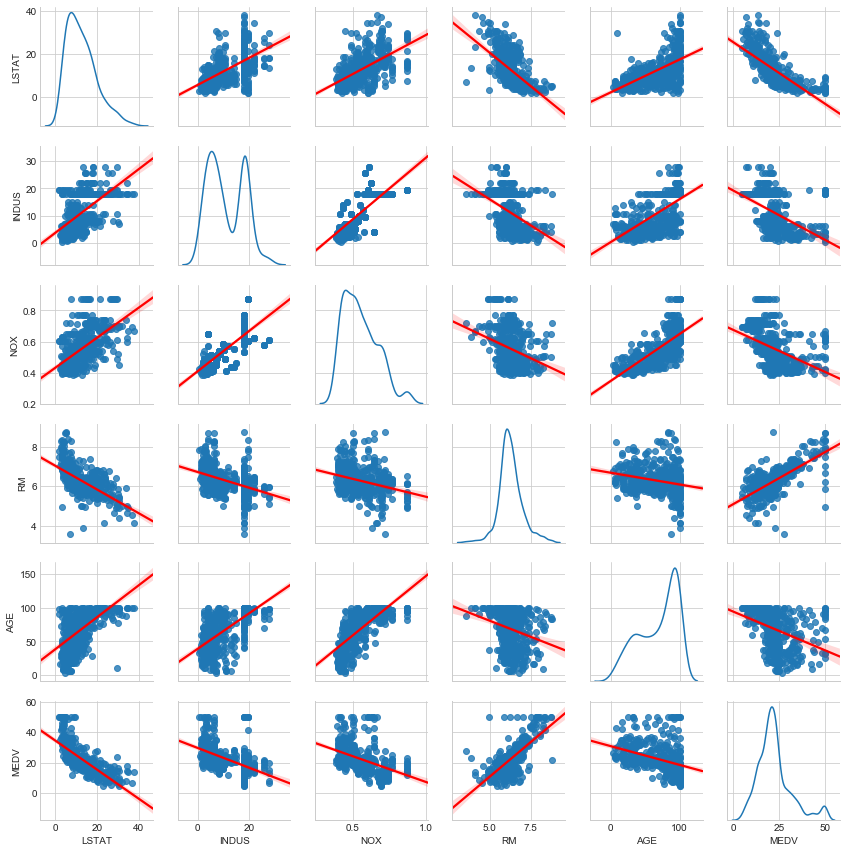

In [26]:
%matplotlib inline
import seaborn as sns
g = sns.pairplot(db, size=2, kind="reg", diag_kind ="kde", plot_kws={'line_kws':{'color':'red'}})


    A partir de las relaciones por pares recién generadas, podemos decir, entre otros, que la relación entre el porcentaje de población de bajo estrato (LSTAT) es inversamente proporcional al número promedio de habitaciones (RM) así como valor (MEDV). Otra de las tenencias marcadas es la concentración de óxido de nitrógeno (nox) y la presencia industrial (INDUS). Para algunos pares de variables, si bien existe una tendencia positiva o negativa, no se observa una clara relación entre los datos. Adicionalmente parecen existir relaciones no lineales entre algunas variables.


* Generate the correlation matrix between these variables using `numpy.corrcoef`. Also include `MEDV`.
     * Which characteristics are more correlated?    

In [27]:
db.corr()

,LSTAT,INDUS,NOX,RM,AGE,MEDV
LSTAT,1.000000,0.603800,0.590879,-0.613808,0.602339,-0.737663
INDUS,0.603800,1.000000,0.763651,-0.391676,0.644779,-0.483725
NOX,0.590879,0.763651,1.000000,-0.302188,0.731470,-0.427321
RM,-0.613808,-0.391676,-0.302188,1.000000,-0.240265,0.695360
AGE,0.602339,0.644779,0.731470,-0.240265,1.000000,-0.376955
MEDV,-0.737663,-0.483725,-0.427321,0.695360,-0.376955,1.000000


De la matriz de correlaciones podemos decir que existen algunas relaciones inversamente proporcionales muy marcadas, tales como el valor de las vivienda (MEDV) y el porcentaje de población de bajo estrato (LSTAT), o la cantidad de habitaciones (RM) y el porcentaje de población de bajo estrato; Otras muestran relacion directamente proporcional, como es el caso del nivel de óxido de Nitrógeno (NOX) y la antiguedad de los edificios (AGE), tambien se observa que entre más alto el número promedio de habitaciones, más alto el valor de las viviendas.

 * BONUS: Visualize this matrix as heat map using Pandas, Matplotlib or Seaborn.

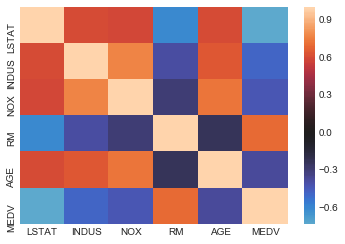

In [28]:
sns.heatmap(db.corr(), center=0)

## 4.4 Modeling linear and non linear relationships

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

* Generate two new subsets filtering these characteristics:
     * $D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$
     * $D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [29]:
D1_X, D1_y= data["RM"], data["MEDV"]
D2_X, D2_y= data["LSTAT"], data["MEDV"]

* For each subset, generate a training partition and a test partition using a ratio of $ 70 \% - 30 \% $

In [30]:
from sklearn.model_selection import train_test_split
D1_X_train, D1_X_test, D1_y_train, D1_y_test = train_test_split(D1_X, D1_y, test_size=0.3, random_state=31415)
D2_X_train, D2_X_test, D2_y_train, D2_y_test = train_test_split(D2_X, D2_y, test_size=0.3, random_state=31415)

* Train a linear regression model on both subsets of data:

In [31]:
from sklearn.linear_model import LinearRegression

# Definición del objeto
logreg_D1 = LinearRegression()
logreg_D2 = LinearRegression()

In [32]:
# Ajuste del modelo en cunjunto de entrenamiento.
logreg_D1.fit(D1_X_train.values.reshape(-1, 1),D1_y_train.values.reshape(-1, 1))
logreg_D2.fit(D2_X_train.values.reshape(-1, 1),D2_y_train.values.reshape(-1, 1))

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [33]:
# Predecir en Conjunto de Test
y_pred_D1=logreg_D1.predict(D1_X_test.values.reshape(-1, 1))
y_pred_D2=logreg_D2.predict(D2_X_test.values.reshape(-1, 1))

* Report the mean square error on the test set

In [34]:
from sklearn.metrics import mean_squared_error, r2_score

$D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

In [35]:
print("MSE: %.2f"% mean_squared_error(D1_y_test, y_pred_D1))
print('R Cuadrado: %.2f' % r2_score(D1_y_test, y_pred_D1))

MSE: 44.92
R Cuadrado: 0.39


$D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [36]:
print("MSE: %.2f"% mean_squared_error(D2_y_test, y_pred_D2))
print('R Cuadrado: %.2f' % r2_score(D2_y_test, y_pred_D2))

MSE: 36.26
R Cuadrado: 0.50


* Print the values of $ w $ and $ w_0 $ of the regression equation

$D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

In [37]:
print('Intercepto: ',logreg_D1.intercept_)
print('Coeficiente: ',logreg_D1.coef_)

Intercepto:  [-36.95044205]
Coeficiente:  [[9.51620105]]


$D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

In [38]:
print('Intercepto: ',logreg_D2.intercept_)
print('Coeficiente: ',logreg_D2.coef_)

Intercepto:  [34.85763354]
Coeficiente:  [[-0.96303512]]


* Generate a graph where you visualize the line obtained by the regression model in conjunction with the training data and the test data

$D_1$:  $X = \textit{'RM'}$, $y = \textit{'MEDV'}$

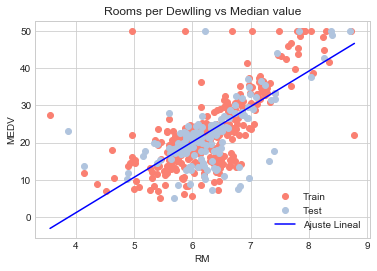

In [39]:
f = lambda x: logreg_D1.coef_*x + logreg_D1.intercept_
x_line = np.array([min(D1_X_train),max(D1_X_train)])

plt.xlabel("RM")
plt.ylabel("MEDV")
plt.title("Rooms per Dewlling vs Median value")
plt.plot(D1_X_train, D1_y_train, 'bo', c="salmon", label="Train")
plt.plot(D1_X_test, D1_y_test, 'bo', c="lightsteelblue", label="Test")
plt.plot(x_line, f(x_line)[0,], c="blue", label="Ajuste Lineal")
plt.legend()

$D_2$:  $X = \textit{'LSTAT'}$, $y = \textit{'MEDV'}$

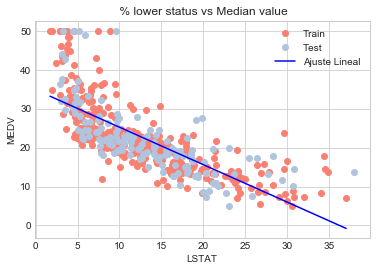

In [40]:
f = lambda x: logreg_D2.coef_*x + logreg_D2.intercept_
x_line = np.array([min(D2_X_train),max(D2_X_train)])

plt.xlabel("LSTAT")
plt.ylabel("MEDV")
plt.title(" % lower status vs Median value")
plt.plot(D2_X_train, D2_y_train, 'bo', c="salmon", label="Train")
plt.plot(D2_X_test, D2_y_test, 'bo', c="lightsteelblue", label="Test")
plt.plot(x_line, f(x_line)[0,], c="blue", label="Ajuste Lineal")
plt.legend()

* How does the model perform on $ D_1 $ and $ D_2 $? Why?

El modelo que utiliza el número de habitaciones para predecir el valor (D1) tiene un error cuadrático medio de 44.92, mientras que el modelo que utiliza el porcentaje de población de bajo estrato tiene un desempeño de 36.26, además el R cuadrado de los modelos corresponde a 0.39 y 0.50 respectivamente. De allí se puede decir que es mejor el desempeño del modelo D2 (LSTAT), Adicionalmente, como lo observábamos en la matriz de correlaciones, la pendiente de regresión del modelo D1 resultó ser positiva (a mayor número de habitaciones, mayor el valor de la vivienda) mientras que para el segundo modelo negativa ( a mayor porcentaje de personas de bajo estrato, menor el precio de la vivienda).

## 4.5 Training a regression model

* Generate a 70-30 partitioning of the data **using all the features**. (Do not include the dependent variable `MEDV`)
* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set
* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set
* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```
Check more information about `StandardScaler` [here](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html).

* Train the following models:
     1. Train a linear regression model using the scaled data.
         * Report the mean square error on the test set
     2. Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
         * Report the mean square error on the test set
     3. Which model has better performance? Why?

Generate a 70-30 partitioning of the data using all the features. (Do not include the dependent variable MEDV)

In [41]:
feature_cols=['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX','PTRATIO', 'B', 'LSTAT']
X=data[feature_cols]
y=data['MEDV']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31415)

* Train a linear regression model with the objective of predicting the output variable `MEDV`.
     * Report the mean square error on the test set

In [43]:
linreg=LinearRegression()
linreg.fit(X_train,y_train)

# Prediccion sobre el conjunto test
y_pred=linreg.predict(X_test)

print("MSE: %.2f"% mean_squared_error(y_test, y_pred))
print('R Cuadrado: %.2f'% r2_score(y_test, y_pred))

MSE: 25.99
R Cuadrado: 0.65


* Train a regression model using `MLPRegressor` in order to predict the output variable` MEDV`.
     * Report the mean square error on the test set

Calibración dela red:

In [44]:
from sklearn.neural_network import MLPRegressor
res=[]
n_neu=[]
for i in range(1800,1850,1):
    n_neu.append(i)
    
    nnet=MLPRegressor(solver='adam',alpha=1e-5, hidden_layer_sizes=(i,), random_state=31415, max_iter=20000)
    nnet_fit=nnet.fit(X_train,y_train)
    nnet_pred=nnet.predict(X_test)
    mse_nnet=mean_squared_error(y_test, nnet_pred)    
  
    res.append(mse_nnet)

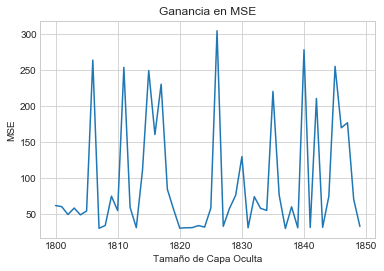

In [45]:
plt.style.use('seaborn-whitegrid')
fig = plt.figure()
ax = plt.axes()
plt.title("Ganancia en MSE")
plt.xlabel("Tamaño de Capa Oculta")
plt.ylabel("MSE")
plt.plot(n_neu, res)
plt.show()

In [46]:
MSE_min=n_neu[res.index(min(res))]
MSE_min


1837

In [47]:
min(res)

29.829668114262834

In [48]:
nn3 = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(1837), random_state=31415, max_iter=20000)
nn3.fit(X_train,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=1837, learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

Curva de costo vs iteración

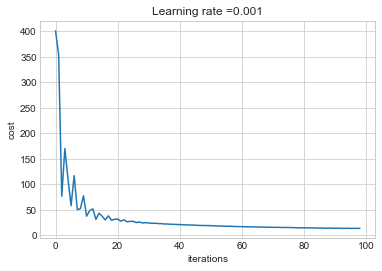

In [49]:
plt.ylabel('cost')
plt.xlabel('iterations')
plt.title("Learning rate =" + str(0.001))
plt.plot(nn3.loss_curve_)
plt.show()

In [50]:
# Prediccion sobre el conjunto test
y_pred_nn=nn3.predict(X_test)

In [51]:
print("MSE: %.2f"% mean_squared_error(y_test, y_pred_nn))

MSE: 29.83


* Scale the data so that they have zero mean variance one per feature (only $ X $). You can use the following piece of code:

```python
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)
```

In [52]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_x.fit(X)
X_train_s = sc_x.transform(X_train)
X_test_s = sc_x.transform(X_test)

Train a linear regression model using the scaled data.
* Report the mean square error on the test set


In [53]:
linreg=LinearRegression()
linreg.fit(X_train_s,y_train)

# Prediccion sobre el conjunto test
y_pred_s=linreg.predict(X_test_s)

print("MSE: %.2f"% mean_squared_error(y_test, y_pred_s))

MSE: 25.99


Train a regression model using a 2-layer MultiLayer Perceptron (128 neurons in the first and 512 in the second) and with the **scaled data**.
* Report the mean square error on the test set


In [54]:
nn4 = MLPRegressor(solver='adam', alpha=1e-5, hidden_layer_sizes=(128,512), random_state=31415, max_iter=20000)
nn4.fit(X_train_s,y_train)

MLPRegressor(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(128, 512), learning_rate='constant',
       learning_rate_init=0.001, max_iter=20000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=31415,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

In [55]:
y_pred_nn4=nn4.predict(X_test_s)

In [56]:
print("MSE: %.2f"% mean_squared_error(y_test, y_pred_nn4))

MSE: 12.88


Which model has better performance? Why?

El modelo que reporta un mejor desempeño es la red con las variables escaladas y los parámetros proporcionados, esto con un error cuadrático medio de 12.88, considerablemente menor al 25 de la regresión lineal que hasta el momento mostraba el mejor desempeño.
Esto se debe a que las variables escaladas mejoran el desempeño del modelo pues ahora los valores de las variables se comportan dentro de rangos similares, se pierde interpretación de las variables, pero se gana asertividad en la predicción, adicionalmente la red Neuronal ganadora tiene dos capas que se acomodan al comportamiento de los datos y mejoran el nivel de predicción del modelo. La red captura relaciones no lineales entre los datos, cosa que no funcionan muy bien con la regresión lineal.